In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import nltk 
from time import time
from collections import Counter
from nltk.corpus import stopwords
from nltk import FreqDist,ngrams,word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
def remove_stopwords(data):
    stop_words = Counter(stopwords.words('english'))
    ans = []
    for each in data:
        if(each not in stop_words.keys()):
            ans.append(each)
    return ans

In [3]:
def lemmatizer(data):
    lmtzr = WordNetLemmatizer()
    ans = []
    for each in data:
        ans.append(lmtzr.lemmatize(each))
    return ans

In [4]:
def stemmer(data):
    ps = PorterStemmer()
    ans = []
    for each in data:
        ans.append(ps.stem(each))
    return ans

In [5]:
def A1_task1(dataset, sw = 0, st = 0, lem= 0):
    data = pd.read_csv(dataset)
    
    # concatenation
    text = ""
    for i in range(data.shape[0]):
        text += data['Text'][i]
    
    tokens = word_tokenize(text)
    if(sw):
        tokens = remove_stopwords(tokens)
    if(lem):
        tokens = lemmatizer(tokens)
    if(st):
        tokens = stemmer(tokens)
        
    fDist = FreqDist(tokens)
    dictionary = dict(zip(fDist.keys(),fDist.values()))
    sorted_dict = sorted(dictionary.items(), key=lambda x: x[1],reverse= True)
   
    x = np.arange(0,400)
    y = [sorted_dict[i][1] for i in range(400)]
    plt.plot(x,y,'r')
    plt.plot(x,y,'b.')
    plt.xlabel("Rank")
    plt.ylabel("Frequency")
    plt.show()                  
     
    print ("TOP 20 Words : ")
    for i in range(20): 
        print (str(i+1)+". "+sorted_dict[i][0]," : ",sorted_dict[i][1])

# Testing with Dataset1

## Analyzing without any preprocessing 

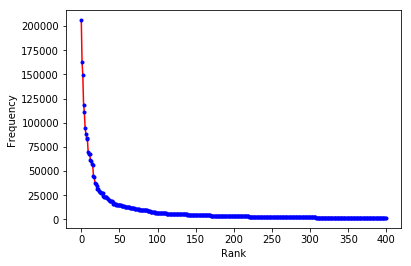

TOP 20 Words : 
1. the  :  205961
2. ,  :  162423
3. to  :  149171
4. a  :  118288
5. i  :  111537
6. .  :  94667
7. is  :  88799
8. ?  :  84690
9. and  :  83215
10. )  :  69432
11. of  :  68121
12. (  :  67465
13. that  :  61290
14. :  :  60627
15. it  :  57113
16. in  :  56031
17. for  :  44410
18. this  :  43486
19. be  :  37528
20. on  :  36206


In [6]:
A1_task1('questions-data.csv', 0, 0, 0) 

## Analyzing after removing stopwords 

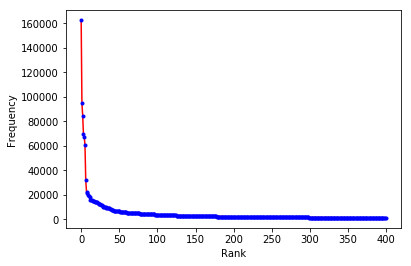

TOP 20 Words : 
1. ,  :  162423
2. .  :  94667
3. ?  :  84690
4. )  :  69432
5. (  :  67465
6. :  :  60627
7. ''  :  31853
8. ``  :  22716
9. ;  :  21738
10. 's  :  20101
11. n't  :  18932
12. would  :  18377
13. server  :  16088
14. key  :  16067
15. password  :  15711
16. using  :  15390
17. %  :  15070
18. use  :  15006
19. security  :  14566
20. [  :  14524


In [10]:
A1_task1('questions-data.csv', 1, 0, 0)

## Analyzing after Lemmatization

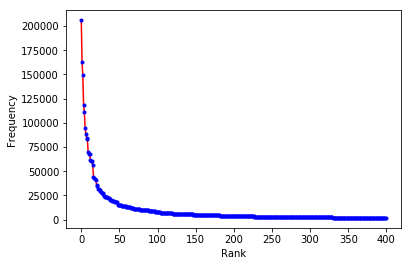

TOP 20 Words : 
1. the  :  205961
2. ,  :  162423
3. to  :  149194
4. a  :  118288
5. i  :  111539
6. .  :  94667
7. is  :  88799
8. ?  :  84690
9. and  :  83216
10. )  :  69432
11. of  :  68121
12. (  :  67465
13. that  :  61343
14. :  :  60627
15. it  :  60530
16. in  :  56039
17. for  :  44410
18. thi  :  43487
19. be  :  41763
20. use  :  40794


In [11]:
A1_task1('questions-data.csv', 0, 1, 0)

## Analyzing after Stemming

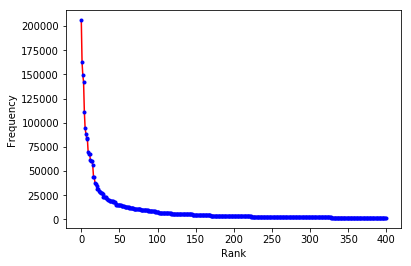

TOP 20 Words : 
1. the  :  205961
2. ,  :  162423
3. to  :  149171
4. a  :  142002
5. i  :  111543
6. .  :  94667
7. is  :  88799
8. ?  :  84690
9. and  :  83215
10. )  :  69432
11. of  :  68121
12. (  :  67465
13. that  :  61290
14. :  :  60627
15. it  :  60530
16. in  :  56039
17. for  :  44410
18. this  :  43486
19. be  :  37536
20. on  :  36206


In [12]:
A1_task1('questions-data.csv', 0, 0, 1)

## Analyzing after removing stopwords, lemmatization and stemming 

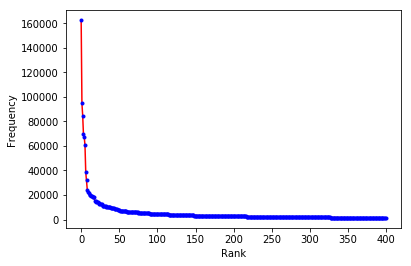

TOP 20 Words : 
1. ,  :  162423
2. .  :  94667
3. ?  :  84690
4. )  :  69432
5. (  :  67465
6. :  :  60627
7. use  :  38605
8. ''  :  31853
9. secur  :  24437
10. ``  :  22716
11. ;  :  21738
12. password  :  20289
13. 's  :  20101
14. key  :  19527
15. n't  :  18932
16. would  :  18377
17. server  :  18312
18. user  :  18273
19. %  :  15070
20. encrypt  :  14772


In [13]:
A1_task1('questions-data.csv', 1, 1, 1)

## Analyzing without any preprocessing 

In [20]:
A1_task1('sem_scho.csv', 0, 0, 0) 

ParserError: Error tokenizing data. C error: Expected 8 fields in line 3, saw 10


## Analyzing after removing stopwords 


In [ ]:
A1_task1('questions-data.csv', 1, 0, 0)

## Analyzing after Lemmatization


In [ ]:
A1_task1('questions-data.csv', 0, 1, 0)


## Analyzing after Stemming


In [ ]:
A1_task1('questions-data.csv', 0, 0, 1)


## Analyzing after removing stopwords, lemmatization and stemming 


In [ ]:
A1_task1('questions-data.csv', 1, 1, 1)

## Observations :  
1. Stop words removal has the most significant effect (considering only the top-20 occuring terms).  
2. 


In [16]:
def A1_task2(dataset):
    data = pd.read_csv(dataset)
    dictionary = set()
    num_tokens = 0 
    T = []
    M = []
    for i in range(data.shape[0]):
        text = data['Text'][i]
        tokens = word_tokenize(text)
        for t in tokens:
            dictionary.add(t) 
        num_tokens += len(tokens)
        T.append(num_tokens)
        M.append(len(dictionary))
    return T,M
        

In [17]:
Terms,Dictionary = A1_task2('questions-data.csv')

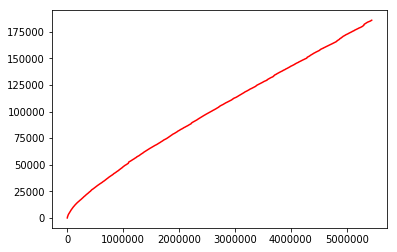

In [18]:
x = np.arange(0,len(Terms))
plt.plot(Terms,Dictionary,'r', )
plt.show()